In [3]:
import torch

<h6><i>Тензор</i> - это многомерный вектор, например:</h6>
<h6>x = np.array([1, 2, 3]) - вектор = тензор с 1 размерностью(точнее: (3,))</h6>
<h6>y = np.array([[1, 2, 3], [4, 5, 6]]) - матрица = тензор с двумя измерениями ((2, 3) в данном случае)

### Создание тензора

In [2]:
a = torch.FloatTensor([1, 2]) # float32
print(a)
a.shape

tensor([1., 2.])


torch.Size([2])

In [3]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
print(b)
b.shape

tensor([[1., 2., 3.],
        [4., 5., 6.]])


torch.Size([2, 3])

In [4]:
x = torch.FloatTensor(2,3,4)
x

tensor([[[-2.9625e-07,  4.5733e-41, -2.9625e-07,  4.5733e-41],
         [ 1.4013e-45,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],

        [[ 7.7056e-36,  0.0000e+00,  2.5852e-36,  0.0000e+00],
         [ 8.2309e-16,  4.5733e-41,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]])

In [5]:
x = torch.FloatTensor(100)
x.shape

torch.Size([100])

In [6]:
x = torch.IntTensor(45, 57, 14, 2)
x.shape

torch.Size([45, 57, 14, 2])

##### Если создавать torch,Tensor то генерируются случайные числа

### Инициализация тензоров

In [7]:
x1 = torch.FloatTensor(3, 2, 4)
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)
x3

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
x = torch.randn((2, 3))
x

tensor([[ 0.9476, -0.2932, -0.8543],
        [ 1.5106, -0.4305,  1.9627]])

In [9]:
x.random_(0, 10) # Дискретное равномерное
x.uniform_(0, 1) # Равномерное
x.normal_(mean=0, std=1)  # норм распределение со средним 0 и дисперсией 1
x.bernoulli_(p=0.5)

tensor([[0., 0., 0.],
        [0., 1., 0.]])

### Изменение формы
##### np.reshape() == torch.view()

b

In [10]:
b.view(3, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [11]:
b, b.stride()

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 (3, 1))

In [12]:
b.reshape(6, 1)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.]])

### Изменение типа тензора

In [16]:
a = torch.FloatTensor([1.5, 3.2, -7])
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [17]:
a.to(torch.int32)

tensor([ 1,  3, -7], dtype=torch.int32)

  ### Фиктивные оси

In [2]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a[:, None, :]


NameError: name 'torch' is not defined

In [27]:
a[:, :, None]

tensor([[[  1.],
         [  2.],
         [  3.]],

        [[ 10.],
         [ 20.],
         [ 30.]],

        [[100.],
         [200.],
         [300.]]])

In [35]:
def vertical_means(A):
    """
    param A: torch.tensor[m,n]
    """
    rows = A.shape[0]
    columns = A.shape[1]
    for col in range(columns):
         print(A[:, col].mean())
    
vertical_means(torch.FloatTensor([[2, 2, 3], [3, 4, 5]]))
            
    

tensor(2.5000)
tensor(3.)
tensor(4.)


In [39]:
def vertical_means(A):
    """
    param A: torch.tensor[m,n]
    """
    result = A.mean(dim=0)
    return result
    
A = torch.FloatTensor([[2, 2, 3], [3, 4, 5]])
vertical_means(A)            

tensor([2.3333, 4.0000])

In [57]:
def normalize_pictures(A):
    """
    param A: torch.Tensor[batch_size, num_channels, width, heigth]
    """
    m = A.mean(dim=(2, 3))
    sigma = A.std(dim=(2, 3))
    result = (A - m[:, :, None, None])/sigma[:, :, None, None]
    return result

batch = torch.randint(0, 156, (64, 3, 300, 300), dtype=torch.float32)
batch.mean(dim=(2,3)) # .shape
normalize_pictures(batch).std()

tensor(1.0000)

### Матричные операции

In [58]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [59]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

In [60]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

### Скалярное произведение векторов

In [61]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [63]:
a.shape, b.shape

(torch.Size([6]), torch.Size([6]))

In [64]:
 a @ b

tensor(-141.)

In [65]:
type(a)

torch.Tensor

In [66]:
type(a @ b)

torch.Tensor

### Матричное произведение

In [68]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [-100, -200, -300]])
a.mm(b)

tensor([[  -321.,   -642.,   -963.],
        [ -3210.,  -6420.,  -9630.],
        [-32100., -64200., -96300.]])

In [69]:
a @ b

tensor([[  -321.,   -642.,   -963.],
        [ -3210.,  -6420.,  -9630.],
        [-32100., -64200., -96300.]])

In [73]:
b = torch.FloatTensor([[-1], [-10], [100]])
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [14]:
def forward_pass(X, w):
    result = torch.sigmoid(X @ w)
    
    
    return result

In [15]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
print(X)
w = torch.FloatTensor([[-0.5], [2.5]])
print(w)
forward_pass(X, w)

tensor([[-5.,  5.],
        [ 2.,  3.],
        [ 1., -1.]])
tensor([[-0.5000],
        [ 2.5000]])


tensor([[1.0000],
        [0.9985],
        [0.0474]])

# CPU(Central Processing Unit) and GPU(Graphical Processing Unit)

In [29]:
x = torch.FloatTensor(1024, 10024).uniform_()
x.is_cuda

False

### Кладем тензор на GPU

In [35]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
x = x.to(device)
x

tensor([[3.4680e-01, 6.6231e-03, 3.4280e-01,  ..., 9.1482e-01, 7.0420e-01,
         9.4229e-01],
        [3.9376e-01, 5.4366e-02, 4.2599e-01,  ..., 2.1922e-01, 8.5599e-01,
         9.1246e-01],
        [9.4693e-01, 3.7408e-02, 6.6948e-01,  ..., 8.8969e-01, 8.5006e-01,
         6.7643e-02],
        ...,
        [4.6188e-01, 3.8083e-01, 1.4788e-01,  ..., 5.5873e-01, 9.0728e-01,
         2.6053e-01],
        [2.7966e-01, 9.7320e-01, 4.0463e-02,  ..., 3.2975e-01, 1.6889e-02,
         4.1528e-01],
        [6.9989e-01, 2.7685e-01, 9.2682e-01,  ..., 4.5580e-04, 2.6526e-01,
         3.9658e-01]])

In [36]:
x = torch.FloatTensor(5, 5, 5).uniform_()
if torch.cuda.is_available():
    # получить имя устройства CUDA
    device = torch.device('cuda')
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to('cpu', torch.double))
    

### Реализуем обучение в логистической регрессии

/home/yunost/Desktop/github/Deep-Learning/jupyterenv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets in

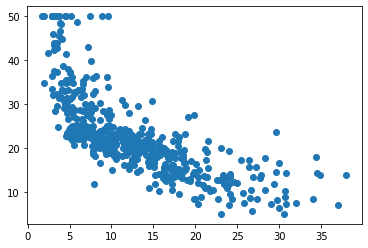

In [1]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target[:])

In [14]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [15]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagate gradients
loss.backward()

In [16]:
print('dL/dw =', w.grad)
print('dL/db =', b.grad)

dL/dw = tensor([-47.3514])
dL/db = tensor([-45.0656])


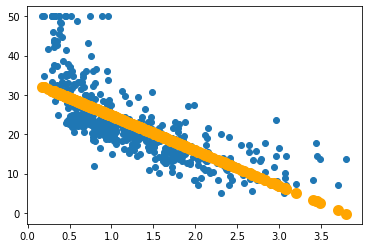

loss =  38.668156


In [18]:
from IPython.display import clear_output

for i in range(100):
    y_pred = w * x + b
    print(f'y_pred = {y_pred[0:5]}')
    
    loss = torch.mean((y_pred - y)**2)
    print(f'loss = {loss}')
    # Вычисляем градиенты
    loss.backward()
    print(f'w.grad = {w.grad}')
    print(f'b.grad = {b.grad}')
    
    # Делаем шаг градиентного спуска
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad
    
    # обнуляем градиенты
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()
        
        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done")

## Градиенты на примере двухслойной сети

In [14]:
dtype = torch.float

# N - размер батча; D_in - входной размер;
# H - размер скрытого слоя; D_out - размер вывода.
N, D_in, H, D_out = 64, 3, 3, 10

# Создание случайных тензоров для хранения входных и выходных данных.
# Настройка requires_grad = False указывает, что там не нужно вычилсять градиенты
# по отношению к этим тензорам во время обратного прохода.

x = torch.randn(N, D_in, dtype=dtype)
y = torch.randn(N, D_out, dtype=dtype)

w1 = torch.randn(D_in, H, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, dtype=dtype, requires_grad=True)

y_pred = (x @ w1).clamp(min=0).matmul(w2)
loss = (y_pred - y).pow(2).sum()

loss.backward()

In [20]:
# заставляем переменную запоминать градиенты функции потерь
y_pred = (x @ w1).clamp(min=0).matmul(w2)
y_pred.retain_grad()

loss = (y_pred - y).pow(2).sum()
loss.retain_grad()

loss.backward()

In [21]:
loss.grad

tensor(1.)

In [22]:
w1

tensor([[ 0.4581,  0.5820, -0.6575],
        [ 0.4388, -1.7897,  0.0935],
        [ 0.1778,  0.3098,  0.4309]], requires_grad=True)

In [23]:
with torch.no_grad():
    pass

# Обучение нейронной сети с использованием PyTorch

In [1]:
import torch

In [2]:
#  Определяем на чем будут производиться вычисления (cuda/cpu)
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cpu')

### Подготовка датасета

In [3]:
from torchvision.datasets import MNIST
import torchvision.transforms as tfs

In [4]:
data_tfs = tfs.Compose([
    tfs.ToTensor(),
    tfs.Normalize((0.5), (0.5))
])

In [5]:
# install for train and test
root = './'
train = MNIST(root, train=True, transform=data_tfs, download=True)
test = MNIST(root, train=False, transform=data_tfs, download=True)

### Не нужно реализовывать batch loader самостоятельно.

In [6]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, drop_last=True)

In [7]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape

torch.Size([128, 1, 28, 28])

## Модель и обучение

In [8]:
features = 784
classes = 10

W = torch.FloatTensor(features, classes).uniform_(-1, 1) / features**0.5
W.requires_grad_()

tensor([[-0.0039,  0.0215,  0.0087,  ..., -0.0161,  0.0292, -0.0118],
        [ 0.0249, -0.0005, -0.0253,  ...,  0.0084,  0.0325,  0.0127],
        [-0.0044, -0.0080, -0.0034,  ..., -0.0214, -0.0088,  0.0194],
        ...,
        [ 0.0041,  0.0325, -0.0278,  ...,  0.0086, -0.0252,  0.0274],
        [-0.0219, -0.0310, -0.0198,  ..., -0.0081,  0.0134,  0.0308],
        [-0.0144, -0.0288, -0.0257,  ..., -0.0027, -0.0329,  0.0211]],
       requires_grad=True)

In [9]:
import numpy as np
from torch.nn.functional import cross_entropy

epochs = 3
lr = 1e-2
history = []
# Кросс-энтропия здесь берется от логитов, а не от вероятностей

In [10]:
for i in range(epochs):
    for x_batch, y_batch in train_loader:
        # загружаем батч данных (вытянутый в линию)
        x_batch = x_batch.reshape(x_batch.shape[0], -1)
        
        # вычисляем фукнцию потерь (log loss, также известная как кросс-энтропия)
        logits = x_batch @ W
        probabilities = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdims=True)
        
        loss = -torch.log(probabilities[range(batch_size), y_batch]).mean()
        history.append(loss.item())
        
        # вычисляем градиент
        loss.backward()
        
        # делаем шаг градиентного спуска
        grad = W.grad
        with torch.no_grad():
            W -= lr * grad
        W.grad.zero_()
    print(f'{i+1}, \t loss: {history[-1]}')

1, 	 loss: 0.19204020500183105
2, 	 loss: 0.13802197575569153
3, 	 loss: 0.11821721494197845


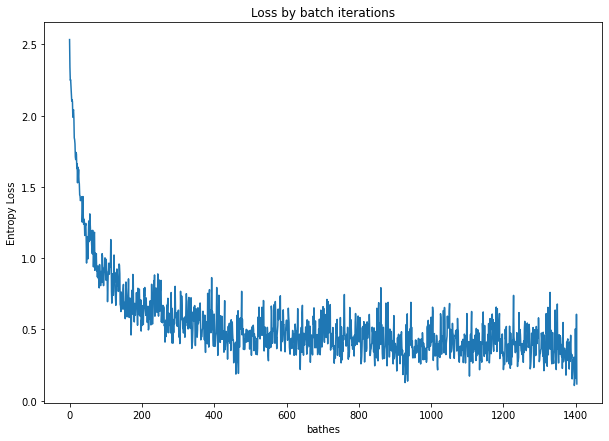

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.plot(history)
plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('bathes')
plt.show()

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
    # загружаем батч данных (вытянутый в линию)
    batches += 1
    x_batch = x_batch.reshape(x_batch.shape[0], -1)
    y_batch = y_batch
    
    preds = torch.argmax(x_batch @ W, dim=1)
    acc += (preds==y_batch).cpu().numpy().mean()
print(acc)
print(f'Test accuracy {acc / batches:.3}')

70.2578125
Test accuracy 0.901


### Простая последовательность для классификации nn.Sequential.

In [14]:
import torch.nn as nn
from torchsummary import summary

In [15]:
model = nn.Sequential(
    nn.Linear(features, 64),
    nn.ReLU(),
    nn.Linear(64, classes)
    
    # НЕ НУЖЕН СОФТМАКС
)

model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=10, bias=True)
)

summary(model, (features,), batch_size=228)

### Определим последние 2 вещи: критерий и оптимизатор

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.99))

In [17]:
epochs = 3
history = []

In [18]:
for i in range(epochs):
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.reshape(x_batch.shape[0], -1).to(device)
        y_batch = y_batch.to(device)
        
        # вычисляем скор с помощью прямого распространения( .forwar or .__cal__)
        logits = model(x_batch)
        
        loss = criterion(logits, y_batch)
        history.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
    print(f'{i + 1}, \t loss: {history[-1]}')
        

1, 	 loss: 0.09372956305742264
2, 	 loss: 0.05995534732937813
3, 	 loss: 0.04531701281666756


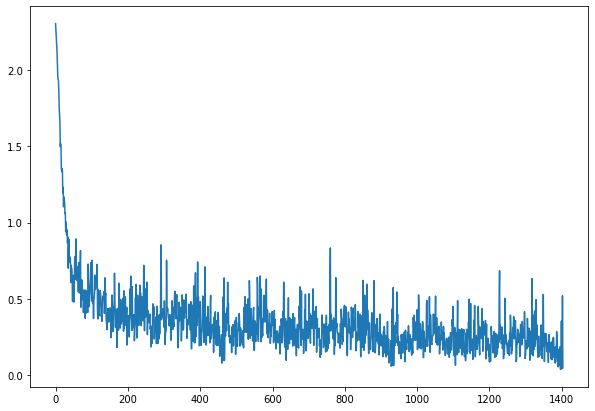

In [19]:
import matplotlib.pyplot as pls

plt.figure(figsize=(10, 7))
plt.plot(history)
plt.show()

In [20]:
len(history)

1404

In [21]:
from sklearn.metrics import accuracy_score

In [34]:
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
    batches += 1
    x_batch = x_batch.reshape(x_batch.shape[0], -1).to(device)
    y_batch = y_batch.to(device)
    
    preds = torch.argmax(model(x_batch), dim=1)
    preds1 = model(x_batch)
    acc += (y_batch==preds).cpu().numpy().mean()
    
print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.943
